## 사과, 파인애플, 바나나 이미지 별 군집하기(비지도학습)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fruits = np.load('fruits_300.npy')

In [5]:
fruits.shape
# 샘플의 갯수, 이미지 높이, 이미지 너비
# 3차원 배열 

(300, 100, 100)

In [10]:
firstfruits = fruits[0, 0, :]
# 3차원 배열의 첫번째 이미지의 첫번째 행 픽셀 100개 들어 있는 값 출력

In [12]:
len(firstfruits)

100

In [13]:
# 흑백사진을 담고 있어 0~255 사이 정숫값 가짐 
# 0에 가까울수록 검고, 255가까울수록 밝게 표시
firstfruits

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

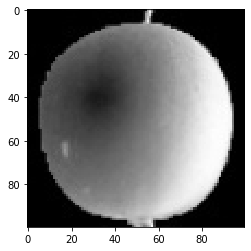

In [14]:
plt.imshow(fruits[0], cmap='gray')
plt.show()
# imshow는 넘파이 배열로 저장된 이미지 쉽게 그림, 흑백이미지이므로 gray 지정

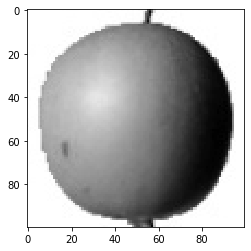

In [15]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()
# 이 그림에선 밝은 부분이 0, 짙은 부분이 255임

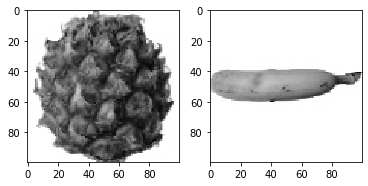

In [20]:
fig, axs = plt.subplots(1, 2)
# 그래프를 쌓을 행과 열 지정
axs[0].imshow(fruits[100], cmap='gray_r')#파인애플, 100번째 행
axs[1].imshow(fruits[200], cmap='gray_r')#바나나, 200번째 행
plt.show()
# 100 / 200 / 300 , 사과, 파인애플, 바나나 각 100개씩 저장되어 있음

In [21]:
# 100x100 이미지 펼쳐서 길이가 10000인 1차원 배열로 만들기 -> 이미지 출력은 어렵지만, 배열 계산할 땐 편리
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)
# reshape로 두번째 차원과 세번째 차원을 10000으로 합침, 
# 첫번째 차원을 -1로 지정하면 자동으로 남은 차원 할당

In [22]:
apple.shape

(100, 10000)

In [23]:
# 배열에 들어 있는 샘플의 픽셀 평균값 계산
# axis=0으로 하면 첫 번째 축인 행을 따라 계산
# axis=1로 지정하면 두번째 축인 열을 따라 계산
# 2차원 배열을 1차원 배열로 치환하였으니 axis=1로 지정하여 계산

In [24]:
# 사과 샘플 100개의 픽셀 평균값 계산
apple.mean(axis=1)

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

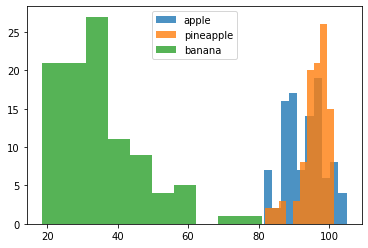

In [26]:
# 사과, 파인애플, 바나나 샘플의 평균값 빈도수를 히스토그램 표시
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()
# 픽셀만으로 파인애플과 사과는 구분하기 어렵다

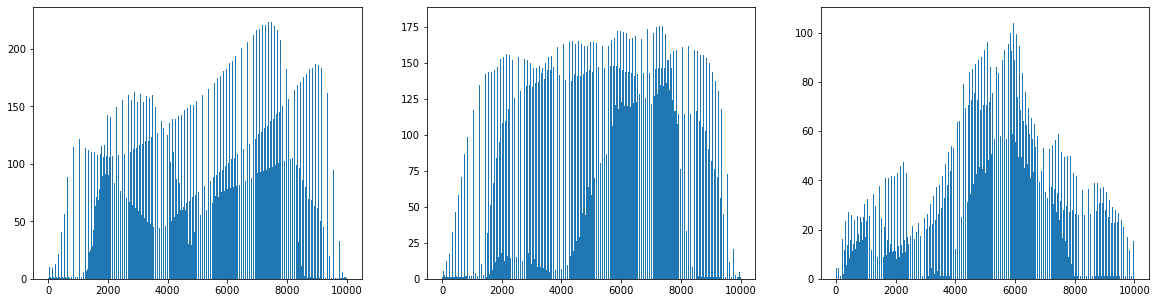

In [29]:
# 샘플의 평균값이 아닌, 픽셀별 평균값을 막대그래프로 그리기

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

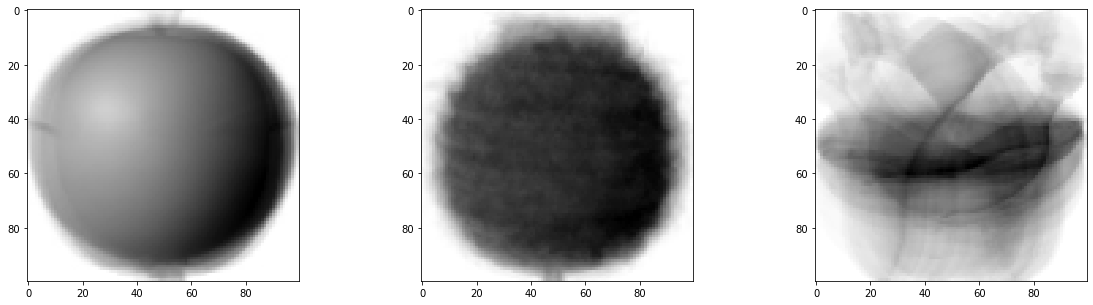

In [31]:
# 픽셀 평균값을 100x100 크기로 바꿔서 이미지처럼 출력해서 위 그래프와 비교
# 모든 사진을 합쳐 놓은 대표 이미지

apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean =  np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()